### Work in progress
Test och se om vi kan bättre utnyttja fält i Litteraturbankens json
* sbl_link --> Wikidata Property 3217 = Svenskt Biografiskt Lexikon
* skbl_link --> Wikidata Property 4963 = Svenskt kvinnobiografiskt lexikon
* sol_link ?!?!?!
* wikidata_id = Wikidata Qnummer
* wikipedia = Wikipedia URL


Denna [Notebook](https://github.com/salgo60/spa2Commons/blob/main/Notebook/Literaturbanken%20-%20samma%20som.ipynb) 
* [issue 3](https://github.com/salgo60/spa2Commons/issues/3) om vi kan bättre förstå hur Litteraturbanken arbetar

**TODO**
 -  [ ] kontrollera data
 -  [ ] förstå vad SOL är
 - [ ] bättre koll diff SBL SKBL skriva ut till fil
 - [ ] kolla samma som LIBRISXL



**Connectivity status**

I en perfekt värld skall
* A = B = E
* C = F 
* D = G

| Date | A: Litteraturbanken show | B: Littbank - WD | C: Littbank - SBL | D: Littbank - SKBL|E: WD - Littbank | F: WD - Littbank - SBL  |G: WD - Littbank - SKBL  |
| ------------- |:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:| -----:|
| 20211001 | 3130 | 2132 | 765 | 152 | 2346 | 810 | 161
| 20211004 | 3174 | 2354 | 809 | 161 | 2364 | 810 | 161
| 20211005 | 3174 | 2354 | 809 | 161 | 2381 | 813 | 163

Saker som detta är enormt viktigt   
* Wikidata behöver auktoriteter att kontrollera kvaliten på vårt data och snabbt se att vi som en öppen plattform inte vandaliseras
* Wikidata med Wikipedia har stort antal visningar - se statistik senaste året > [15000 visningar per dag](https://pageviews.toolforge.org/massviews/?platform=all-access&agent=user&source=category&range=last-year&subjectpage=0&subcategories=0&sort=views&direction=1&view=list&target=https://sv.wikipedia.org/wiki/Kategori:Litteraturbanken) på de artiklar som länkar Litteraturbanken --> vi drar traffik till Litteraturbanken
* vi ser mer och mer brister hos Kungliga biblioteket och andra äldre auktorieteter att dom har gamla plattformar/teknik där fyller en plattform som Wikidata med sina fel och brister en ny möjlighet se [tankar](https://github.com/salgo60/spa2Commons/issues/3) 
* ju fler som kopplar ihop sig med varandra desto snabbare/enklare blir denna process
* på sikt hoppas vi få ett kulturarv där vi jobbar ihop även fast det går långsamt


In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-10-05 01:29:50.898065


In [2]:
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
 
url = "https://litteraturbanken.se/api/get_authors"
r = http.request('GET', url)
data = json.loads(r.data)
df = pd.json_normalize(data["data"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   authorid                       4046 non-null   object 
 1   authorid_norm                  4046 non-null   object 
 2   db_checksum                    4046 non-null   object 
 3   db_timestamp                   4046 non-null   int64  
 4   doc_type                       4046 non-null   object 
 5   full_name                      4046 non-null   object 
 6   gender                         4046 non-null   object 
 7   imported                       3388 non-null   object 
 8   intro                          729 non-null    object 
 9   librisid                       2180 non-null   object 
 10  name_for_index                 4046 non-null   object 
 11  pictureinfo                    169 non-null    object 
 12  searchable                     4046 non-null   b

In [4]:
df["show"].value_counts()

True     3174
False     872
Name: show, dtype: int64

In [5]:
#just objects with show
dfShow = df[df["show"]].copy() 

In [6]:
dfexternal = dfShow[{"authorid","wikidata.sbl_link","wikidata.skbl_link","wikidata.wikidata_id","wikidata.sol_link"
,"wikidata.wikidata_id","wikidata.wikipedia"}]

In [7]:
dfexternal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 1 to 4045
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   authorid              3174 non-null   object
 1   wikidata.wikidata_id  2358 non-null   object
 2   wikidata.sbl_link     810 non-null    object
 3   wikidata.sol_link     128 non-null    object
 4   wikidata.skbl_link    161 non-null    object
 5   wikidata.wikipedia    1879 non-null   object
dtypes: object(6)
memory usage: 173.6+ KB


In [8]:
dfexternal["wikidata.sol_link"].value_counts()

Bo_Carpelan                      1
Hedvig_Charlotta_Nordenflycht    1
Lars_Arnell                      1
Karin_Jensen                     1
Johan_Henric_Kellgren            1
                                ..
Lars_Forssell                    1
Peter_Lindahl                    1
Johan_Henrik_Thomander           1
Johan_Gabriel_Oxenstierna        1
Walborg_Hedberg                  1
Name: wikidata.sol_link, Length: 128, dtype: int64

In [9]:
dfexternal

,authorid,wikidata.wikidata_id,wikidata.sbl_link,wikidata.sol_link,wikidata.skbl_link,wikidata.wikipedia
1,AasenE,Q11967131,None,None,None,None
2,AbeniusM,Q4933592,None,None,MargitAbenius,https://sv.wikipedia.org/wiki/Margit_Abenius
3,AbrahamssonA,Q24680938,None,None,None,https://sv.wikipedia.org/wiki/Augusta_Abrahamsson
5,AbrahamssonS,Q4934135,None,None,None,https://sv.wikipedia.org/wiki/Selma_Abrahamsson
6,AchariusE,Q365923,5503,None,None,https://sv.wikipedia.org/wiki/Erik_Acharius
...,...,...,...,...,...,...
4037,ÖnnerforsA,Q1237808,None,None,None,https://sv.wikipedia.org/wiki/Alf_%C3%96nnerfors
4039,ÖstergrenCL,Q6257795,None,None,None,https://sv.wikipedia.org/wiki/Carl_%C3%96stergren
4040,ÖstergrenC,Q108406266,None,None,None,None
4043,ÖstinO,Q100752816,None,None,None,None


### Get Wikidata

In [10]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

# https://w.wiki/4AAV
query = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?authorid ?SBL ?SKBL WHERE {
#?item wdt:P31 wd:Q5. also literary society can have P5101 
?item wdt:P5101 ?authorid
OPTIONAL {?item wdt:P3217 ?SBL}
OPTIONAL {?item wdt:P4963 ?SKBL}
} order by ?authorid"""
 
    
def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']
    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDLittbanktot = get_sparql_dataframe(endpoint_url, query)


In [11]:
WDLittbanktot['SBL'] = pd.to_numeric(WDLittbanktot['SBL'], errors="coerce")
WDLittbanktot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WikidataID  2381 non-null   object 
 1   authorid    2381 non-null   object 
 2   SBL         813 non-null    float64
 3   SKBL        163 non-null    object 
dtypes: float64(1), object(3)
memory usage: 74.5+ KB


In [12]:
# Find duplicates
WDLittbanktot[WDLittbanktot.duplicated(["authorid"],keep=False)]

,WikidataID,authorid,SBL,SKBL


In [13]:
dfexternal['wikidata.sbl_link'] = pd.to_numeric(dfexternal['wikidata.sbl_link'],downcast="integer", errors="coerce")
#dfexternal['wikidata.sbl_link'] = pd.to_numeric(dfexternal['wikidata.sbl_link'],downcast="integer", 
#dfexternal["wikidata.sbl_link"] = dfexternal["wikidata.sbl_link"].astype(int)                                                
dfexternal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 1 to 4045
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   authorid              3174 non-null   object 
 1   wikidata.wikidata_id  2358 non-null   object 
 2   wikidata.sbl_link     810 non-null    float64
 3   wikidata.sol_link     128 non-null    object 
 4   wikidata.skbl_link    161 non-null    object 
 5   wikidata.wikipedia    1879 non-null   object 
dtypes: float64(1), object(5)
memory usage: 173.6+ KB


<ipython-input-13-31b367449b4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfexternal['wikidata.sbl_link'] = pd.to_numeric(dfexternal['wikidata.sbl_link'],downcast="integer", errors="coerce")


In [14]:
dfexternal

,authorid,wikidata.wikidata_id,wikidata.sbl_link,wikidata.sol_link,wikidata.skbl_link,wikidata.wikipedia
1,AasenE,Q11967131,NaN,None,None,None
2,AbeniusM,Q4933592,NaN,None,MargitAbenius,https://sv.wikipedia.org/wiki/Margit_Abenius
3,AbrahamssonA,Q24680938,NaN,None,None,https://sv.wikipedia.org/wiki/Augusta_Abrahamsson
5,AbrahamssonS,Q4934135,NaN,None,None,https://sv.wikipedia.org/wiki/Selma_Abrahamsson
6,AchariusE,Q365923,5503.0,None,None,https://sv.wikipedia.org/wiki/Erik_Acharius
...,...,...,...,...,...,...
4037,ÖnnerforsA,Q1237808,NaN,None,None,https://sv.wikipedia.org/wiki/Alf_%C3%96nnerfors
4039,ÖstergrenCL,Q6257795,NaN,None,None,https://sv.wikipedia.org/wiki/Carl_%C3%96stergren
4040,ÖstergrenC,Q108406266,NaN,None,None,None
4043,ÖstinO,Q100752816,NaN,None,None,None


### Compare Littbank Wikidata field with Wikidata 


In [15]:
WDLittbank_WD_merge =  pd.merge(WDLittbanktot, dfexternal, how='outer',on='authorid',indicator=True)
WDLittbank_WD_merge.rename(columns={"_merge": "WD_Littbank_merge"},inplace = True)
WDLittbank_WD_merge['WD_Littbank_merge'] = WDLittbank_WD_merge['WD_Littbank_merge'].str.replace('left_only','WD_only').str.replace('right_only','Litteraturbanken_only')

WDLittbank_WD_merge["WD_Littbank_merge"].value_counts()

both                     2378
Litteraturbanken_only     796
WD_only                     3
Name: WD_Littbank_merge, dtype: int64

In [16]:
#Mismatch Littbank -> WD
#WDLittbank_WD_merge.info()
WDLittbank_WD_merge_not_Null = WDLittbank_WD_merge[WDLittbank_WD_merge["wikidata.wikidata_id"].notnull()]
WDLittbank_WD_merge_not_Null["WD_Littbank_merge"].value_counts()

both    2358
Name: WD_Littbank_merge, dtype: int64

In [17]:
WDLittbank_WD_merge_not_Null[WDLittbank_WD_merge["WD_Littbank_merge"]!="both"]

<ipython-input-17-db634123d3fb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  WDLittbank_WD_merge_not_Null[WDLittbank_WD_merge["WD_Littbank_merge"]!="both"]


,WikidataID,authorid,SBL,SKBL,wikidata.wikidata_id,wikidata.sbl_link,wikidata.sol_link,wikidata.skbl_link,wikidata.wikipedia,WD_Littbank_merge


In [18]:
# all with SBL seems to have WIkidata
WDLittbanktotSBL =  WDLittbank_WD_merge[~WDLittbank_WD_merge['wikidata.sbl_link'].isnull()]
WDLittbanktotSBL_noWD = WDLittbanktotSBL[WDLittbanktotSBL['wikidata.wikidata_id'].isnull()] 
WDLittbanktotSBL_noWD

,WikidataID,authorid,SBL,SKBL,wikidata.wikidata_id,wikidata.sbl_link,wikidata.sol_link,wikidata.skbl_link,wikidata.wikipedia,WD_Littbank_merge


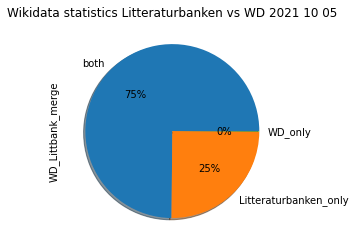

In [19]:
%matplotlib inline 
import matplotlib.pyplot as plt   
mergeCheckNumber = WDLittbank_WD_merge["WD_Littbank_merge"].value_counts()
plotmerge = mergeCheckNumber.plot.pie( \
                   autopct='%1.0f%%', \
                   shadow=True, startangle=0, \
                   title = "Wikidata statistics Litteraturbanken vs WD " + start_time.strftime('%Y %m %d'))
plt.savefig('LitteraturbankenWD.png')
plt.show()

### Littbanks missing in WD

In [20]:
#WDLittbanktot.info()
#WDLittbank_WD_merge["WD_Littbank_merge"].value_counts()
#WDLittbank_WD_SBL_merge_outer[WDLittbank_WD_SBL_merge_outer["WD_Littbank_SBL_merge_outer"]!="right_only"]

In [21]:
#WDLittbank_WD_SBL_merge_outer[WDLittbank_WD_SBL_merge_outer["WD_Littbank_SBL_merge_outer"]  
#                             !="right_only"].to_csv("Littbank_missing_in_WD.csv")

### SBL

In [22]:
WDLittbanktot_SBL = WDLittbanktot[~WDLittbanktot["SBL"].isna()]
WDLittbanktot_SBL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 5 to 2311
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WikidataID  813 non-null    object 
 1   authorid    813 non-null    object 
 2   SBL         813 non-null    float64
 3   SKBL        80 non-null     object 
dtypes: float64(1), object(3)
memory usage: 31.8+ KB


In [23]:
# Find duplicates
WDLittbanktot_SBL[WDLittbanktot_SBL.duplicated(["SBL"],keep=False)]

,WikidataID,authorid,SBL,SKBL


In [24]:
dfexternal_SBL = dfexternal[~dfexternal["wikidata.sbl_link"].isna()]

In [25]:
dfexternal_SBL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 6 to 3918
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   authorid              810 non-null    object 
 1   wikidata.wikidata_id  810 non-null    object 
 2   wikidata.sbl_link     810 non-null    float64
 3   wikidata.sol_link     69 non-null     object 
 4   wikidata.skbl_link    79 non-null     object 
 5   wikidata.wikipedia    808 non-null    object 
dtypes: float64(1), object(5)
memory usage: 44.3+ KB


In [26]:
WDLittbank_WD_SBL_merge =  pd.merge(WDLittbanktot_SBL, dfexternal_SBL, left_on='SBL', right_on='wikidata.sbl_link',indicator=True)
WDLittbank_WD_SBL_merge.rename(columns={"_merge": "WD_Littbank_SBL_merge"},inplace = True)

WDLittbank_WD_SBL_merge["WD_Littbank_SBL_merge"].value_counts()

both          810
left_only       0
right_only      0
Name: WD_Littbank_SBL_merge, dtype: int64

#### SBL in Wikidata but not Littbank 

In [27]:
WDLittbank_WD_SBL_merge_outer =  pd.merge(WDLittbanktot_SBL, dfexternal_SBL, how='outer',left_on='SBL', right_on='wikidata.sbl_link',indicator=True)
WDLittbank_WD_SBL_merge_outer.rename(columns={"_merge": "WD_Littbank_SBL_merge_outer"},inplace = True)

WDLittbank_WD_SBL_merge_outer["WD_Littbank_SBL_merge_outer"].value_counts()

both          810
left_only       4
right_only      0
Name: WD_Littbank_SBL_merge_outer, dtype: int64

In [28]:
WDLittbank_WD_SBL_merge_outer[WDLittbank_WD_SBL_merge_outer["WD_Littbank_SBL_merge_outer"]!="both"]

,WikidataID,authorid_x,SBL,SKBL,authorid_y,wikidata.wikidata_id,wikidata.sbl_link,wikidata.sol_link,wikidata.skbl_link,wikidata.wikipedia,WD_Littbank_SBL_merge_outer
63,Q5571164,BergCO,18538.0,None,NaN,NaN,NaN,NaN,NaN,NaN,left_only
418,Q5818596,HydénN,13919.0,None,NaN,NaN,NaN,NaN,NaN,NaN,left_only
434,Q38283505,JansonB,12039.0,BettyJanson,NaN,NaN,NaN,NaN,NaN,NaN,left_only
448,Q1677426,JosephsonJA,12217.0,None,NaN,NaN,NaN,NaN,NaN,NaN,left_only


## SKBL

In [29]:
WDLittbanktot_SKBL = WDLittbanktot[~WDLittbanktot["SKBL"].isna()]
WDLittbanktot_SKBL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 2 to 2370
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WikidataID  163 non-null    object 
 1   authorid    163 non-null    object 
 2   SBL         80 non-null     float64
 3   SKBL        163 non-null    object 
dtypes: float64(1), object(3)
memory usage: 6.4+ KB


In [30]:
dfexternal_SKBL = dfexternal[~dfexternal["wikidata.skbl_link"].isna()]
dfexternal_SKBL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 2 to 4028
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   authorid              161 non-null    object 
 1   wikidata.wikidata_id  161 non-null    object 
 2   wikidata.sbl_link     79 non-null     float64
 3   wikidata.sol_link     25 non-null     object 
 4   wikidata.skbl_link    161 non-null    object 
 5   wikidata.wikipedia    161 non-null    object 
dtypes: float64(1), object(5)
memory usage: 8.8+ KB


In [31]:
WDLittbank_WD_SKBL_merge =  pd.merge(WDLittbanktot_SKBL, dfexternal_SKBL,how='outer', left_on='SKBL', right_on='wikidata.skbl_link',indicator=True)
WDLittbank_WD_SKBL_merge.rename(columns={"_merge": "WD_Littbank_SKBL_merge"},inplace = True)

WDLittbank_WD_SKBL_merge["WD_Littbank_SKBL_merge"].value_counts()

both          161
left_only       2
right_only      0
Name: WD_Littbank_SKBL_merge, dtype: int64

In [32]:
#WDLittbank_WD_SKBL_merge.info()

WDLittbank_WD_SKBL_merge[WDLittbank_WD_SKBL_merge["WD_Littbank_SKBL_merge"]!="both"]

,WikidataID,authorid_x,SBL,SKBL,authorid_y,wikidata.wikidata_id,wikidata.sbl_link,wikidata.sol_link,wikidata.skbl_link,wikidata.wikipedia,WD_Littbank_SKBL_merge
63,Q4954023,HillbäckE,NaN,EllaHillback,NaN,NaN,NaN,NaN,NaN,NaN,left_only
68,Q38283505,JansonB,12039.0,BettyJanson,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [33]:
print("|",start_time.strftime("%Y%m%d"),"|",dfShow["authorid"].nunique(),
     "|",dfShow["wikidata.wikidata_id"].nunique(),
     "|",dfShow["wikidata.sbl_link"].nunique(),
     "|",dfShow["wikidata.skbl_link"].nunique(),
     "|",WDLittbanktot["authorid"].nunique(),
     "|",WDLittbanktot["SBL"].nunique(),
     "|",WDLittbanktot["SKBL"].nunique()
     )

| 20211005 | 3174 | 2354 | 809 | 161 | 2381 | 813 | 163


In [34]:
#dfShow["wikidata.wikidata_id"].nunique()

In [35]:
#WDLittbanktot.info()

In [36]:
#WDLittbanktot["authorid"].nonunique()
WDLittbanktot[WDLittbanktot["authorid"].duplicated()]

,WikidataID,authorid,SBL,SKBL


In [37]:
#df[df.duplicated(['ID'], keep=False)]

In [38]:
WDLittbanktot[WDLittbanktot.duplicated(["authorid"],keep=False)]

,WikidataID,authorid,SBL,SKBL


In [39]:
#WDLittbanktot[WDLittbanktot["authorid"]==WDLittbanktot[WDLittbanktot["authorid"].duplicated()]].sort_values("authorid")

In [40]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ass.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-10-05 01:29:57.049412
Time elapsed (hh:mm:ass.ms) 0:00:06.151547
